In [25]:
#     API Quandl
#     Data cleanup
#     Materials Monte Carlo = XLB
#     Real Estate Monte Carlo = RWR
#     Technology Monte Carlo = XLK

In [26]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [27]:
#QUANDL Data retrieval

#Load quandl api_key
load_dotenv()

api_key = os.getenv("QUANDL_API_KEY")
type(api_key)



str

In [28]:
#Create request url to access quandl to get prices for XLB, S&P Materials Sector ETF

#request_url = "https://www.quandl.com/api/v3/datasets/WIKI/XLB.json?api_key="
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/RWR/data.csv?api_key="

# Concatenate request_url and api_key. Store as new variable
request_url_api = request_url + api_key


In [29]:
# Execute get request, this returned error, XLB, RWR, and XLK not in free wiki dataset.

response_data = requests.get(request_url_api)
response_data.content

b'code,message\nQECx02,You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.\n'

In [62]:
#Try ALPACA data retrieval next
load_dotenv()

APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_SECRET_KEY = os.getenv("APCA_SECRET_KEY")

api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')

type(APCA_API_KEY_ID)


str

In [88]:
#Use alpha vantage to get historic quotes for XLB,XLK,RWR. This goes back 20 years.

xlb_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')
xlb_df.head()

xlk_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')
# xlk_df.tail()

rwr_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')
#rwr_df.head()



#CODE BELOW WAS FIRST ATTEMPT BUT ONLY GETS 1000 TRADING DAYS:

# # Get daily price data for XLB over the last 1000 trading days. Max alpaca would allow.
# #download direct into dataframe

# barset = api.get_barset('XLB', 'day', limit=1000).df
# xlb_bars_df = barset['XLB']
# xlb_bars_df.head()
# xlb_bars_df.tail()

# Get daily price data for XLK over the last 1000 trading days. Max alpaca would allow.

# barset = api.get_barset('XLK', 'day', limit=1000).df
# xlk_bars_df = barset['XLK']
# xlk_bars_df.head()
# xlk_bars_df.tail()

# # Get daily price data for RWR over the last 1000 trading days. Max alpaca would allow.

# barset = api.get_barset('RWR', 'day', limit=1000).df
# rwr_bars_df = barset['RWR']
# rwr_bars_df.head()
# rwr_bars_df.tail()





In [89]:
rwr_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-04-27,73.71,76.4600,73.7100,76.08,76.08,211081.0,0.0,1.0
2020-04-24,72.95,73.7380,72.0700,73.25,73.25,113694.0,0.0,1.0
2020-04-23,73.74,74.2700,72.4900,72.68,72.68,120035.0,0.0,1.0
2020-04-22,73.65,74.1154,73.0000,73.55,73.55,136871.0,0.0,1.0
2020-04-21,71.99,73.2700,71.5072,72.70,72.70,170551.0,0.0,1.0


In [90]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xlb_df = xlb_df['5. adjusted close']
xlb_df.head()

xlk_df = xlk_df['5. adjusted close']
xlk_df.head()

rwr_df = rwr_df['5. adjusted close']
rwr_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xlb_df, xlk_df, rwr_df], axis = "columns", join = "inner")
concat_df.head()



,5. adjusted close,5. adjusted close,5. adjusted close
date,,,
2020-04-27,51.19,89.39,76.08
2020-04-24,49.86,88.63,73.25
2020-04-23,49.09,86.79,72.68
2020-04-22,48.75,87.39,73.55
2020-04-21,47.81,84.15,72.70


In [91]:
#Change column names to avoid confusion
columns = ['XLB close', 'XLK close', 'RWR close']
concat_df.columns = columns
concat_df.head()

,XLB close,XLK close,RWR close
date,,,
2020-04-27,51.19,89.39,76.08
2020-04-24,49.86,88.63,73.25
2020-04-23,49.09,86.79,72.68
2020-04-22,48.75,87.39,73.55
2020-04-21,47.81,84.15,72.70


In [92]:
#add another column to get daily returns of XLB
daily_returns_xlb = xlb_df.pct_change()
concat_df['XLB_return']= daily_returns_xlb 

#add another column to get daily returns of XLK
daily_returns_xlk = xlk_df.pct_change()
concat_df['XLK_return']= daily_returns_xlk 

#add another column to get daily returns of RWR
daily_returns_rwr = rwr_df.pct_change()
concat_df['RWR_return']= daily_returns_rwr 

concat_df.head()


,XLB close,XLK close,RWR close,XLB_return,XLK_return,RWR_return
date,,,,,,
2020-04-27,51.19,89.39,76.08,NaN,NaN,NaN
2020-04-24,49.86,88.63,73.25,-0.025982,-0.008502,-0.037198
2020-04-23,49.09,86.79,72.68,-0.015443,-0.020760,-0.007782
2020-04-22,48.75,87.39,73.55,-0.006926,0.006913,0.011970
2020-04-21,47.81,84.15,72.70,-0.019282,-0.037075,-0.011557


In [94]:
#check for nulls

concat_df.isnull().sum()

XLB close     0
XLK close     0
RWR close     0
XLB_return    1
XLK_return    1
RWR_return    1
dtype: int64

In [97]:
# Drop nulls
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLB close     0
XLK close     0
RWR close     0
XLB_return    0
XLK_return    0
RWR_return    0
dtype: int64

In [98]:
# Checking for duplicate rows
concat_df.duplicated()

date
2020-04-24    False
2020-04-23    False
2020-04-22    False
2020-04-21    False
2020-04-20    False
              ...  
2001-08-31    False
2001-08-30    False
2001-08-29    False
2001-08-28    False
2001-08-27    False
Length: 4694, dtype: bool

In [100]:
# drop duplicates
concat_df.drop_duplicates(inplace=True)

,XLB close,XLK close,RWR close,XLB_return,XLK_return,RWR_return
date,,,,,,
2020-04-24,49.8600,88.6300,73.2500,-0.025982,-0.008502,-0.037198
2020-04-23,49.0900,86.7900,72.6800,-0.015443,-0.020760,-0.007782
2020-04-22,48.7500,87.3900,73.5500,-0.006926,0.006913,0.011970
2020-04-21,47.8100,84.1500,72.7000,-0.019282,-0.037075,-0.011557
2020-04-20,49.0200,87.8300,73.8500,0.025309,0.043731,0.015818
...,...,...,...,...,...,...
2001-08-31,14.3213,17.8861,18.7625,0.000000,0.022203,0.001623
2001-08-30,14.1971,17.7384,18.8082,-0.008672,-0.008258,0.002436
2001-08-29,14.2494,18.4533,18.8996,0.003684,0.040302,0.004860


In [102]:
#Check datatypes

concat_df.dtypes

XLB close     float64
XLK close     float64
RWR close     float64
XLB_return    float64
XLK_return    float64
RWR_return    float64
dtype: object

In [103]:
#check counts
concat_df.count()

XLB close     4694
XLK close     4694
RWR close     4694
XLB_return    4694
XLK_return    4694
RWR_return    4694
dtype: int64

In [104]:
#use describe to explore data
concat_df.describe()

,XLB close,XLK close,RWR close,XLB_return,XLK_return,RWR_return
count,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000
mean,32.450462,30.760537,53.316196,-0.000152,-0.000218,-0.000112
std,13.540943,20.021458,23.920293,0.015253,0.014740,0.019135
min,11.161600,8.997400,15.299700,-0.105226,-0.118881,-0.148796
25%,20.761800,16.708675,33.173525,-0.008086,-0.006873,-0.007386
50%,30.468350,21.585850,49.574250,-0.000827,-0.000938,-0.000836
75%,43.472600,39.155900,75.215000,0.006640,0.005708,0.005979
max,61.111600,102.250500,106.602100,0.142400,0.160282,0.263494


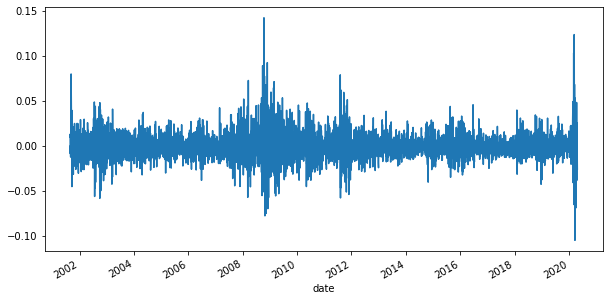

In [106]:
#plot daily returns of XLB

concat_df['XLB_return'].plot(figsize=(10,5))

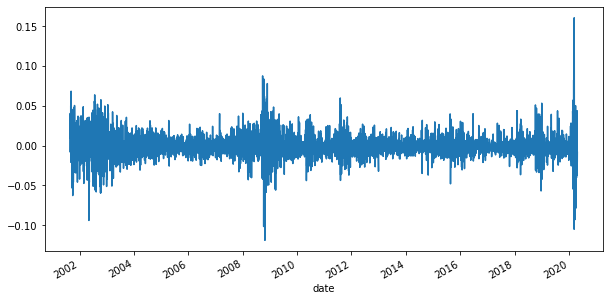

In [108]:
#plot daily returns of XLK

concat_df['XLK_return'].plot(figsize=(10,5))

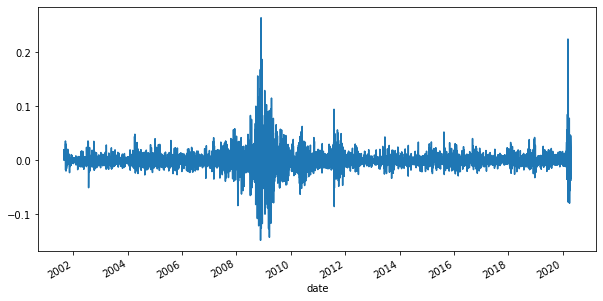

In [109]:
#plot daily returns of RWR

concat_df['RWR_return'].plot(figsize=(10,5))

In [110]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_xlb = (1 + daily_returns_xlb).cumprod()
cumulative_returns_xlk = (1 + daily_returns_xlk).cumprod()
cumulative_returns_rwr = (1 + daily_returns_rwr).cumprod()

cumulative_returns_xlb.head()

date
2020-04-27         NaN
2020-04-24    0.974018
2020-04-23    0.958976
2020-04-22    0.952334
2020-04-21    0.933971
Name: 5. adjusted close, dtype: float64

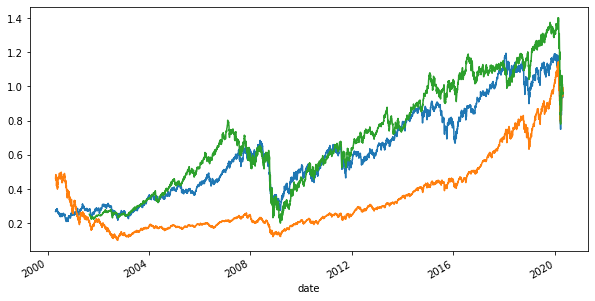

In [116]:
#plot cumulative returns

cumulative_returns_xlb.plot(figsize=(10,5))
cumulative_returns_xlk.plot(figsize=(10,5))
cumulative_returns_rwr.plot(figsize=(10,5))

In [ ]:
#need to check on dividend